# Build SVM Classifiers based on annotated data

## Load data

The data given is in **`brat`** format. We have to parse it first and then extract the sentences and their topics.

In [19]:
from bratreader.repomodel import RepoModel

ann1 = RepoModel("data_annotated/AnnotationWorkshop/Ann1")
ann2 = RepoModel("data_annotated/AnnotationWorkshop/Ann2")
ann3 = RepoModel("data_annotated/AnnotationWorkshop/Ann3")
ann4 = RepoModel("data_annotated/AnnotationWorkshop/Ann4")
ann5 = RepoModel("data_annotated/AnnotationWorkshop/Ann5")
ann6 = RepoModel("data_annotated/AnnotationWorkshop/Ann6")

ann7 = RepoModel("data_annotated/AnnotationWorkshop2/Alina")
ann8 = RepoModel("data_annotated/AnnotationWorkshop2/Mayra")
ann9 = RepoModel("data_annotated/AnnotationWorkshop2/Nick")
ann10 = RepoModel("data_annotated/AnnotationWorkshop2/Penny")
ann11 = RepoModel("data_annotated/ZSI")

In [20]:
ann1d = list(ann1.documents.values())
ann2d = list(ann2.documents.values())
ann3d = list(ann3.documents.values())
ann4d = list(ann4.documents.values())
ann5d = list(ann5.documents.values())
ann6d = list(ann6.documents.values())

ann7d = list(ann7.documents.values())
ann8d = list(ann8.documents.values())
ann9d = list(ann9.documents.values())
ann10d = list(ann10.documents.values())
ann11d = list(ann11.documents.values())

In [21]:
documents = ann1d + ann2d + ann3d + ann4d + ann5d + ann6d + ann7d + ann8d + ann9d + ann10d + ann11d

Take all the sentences from each document and put them in one big list

In [22]:
def remove_topic_subcategory(topic):
    stripped = topic.split('_')
    if len(stripped) == 3: 
        return stripped[1]
    elif len(stripped) == 1:
        return stripped[0]
    elif len(stripped) == 2:
        return stripped[1]
    else:
        raise Exception('Unknown type of Topic: ' + topic)

In [23]:
sentences = list()
sentences_topics = list()

Remove duplicate sentences and remove subtopics

In [24]:
for document in documents:
    for sentence in document.sentences:
        sent = ' '.join([w.form for w in sentence.words])
        if sent in sentences:
            index = sentences.index(sent)
            sentences_topics[index] += list(set([remove_topic_subcategory(keys) for w in sentence.words for annotation in w.annotations for keys in annotation.labels.keys()]))
        else:
            sentences.append(sent)
            sentences_topics.append(list(set([remove_topic_subcategory(keys) for w in sentence.words for annotation in w.annotations for keys in annotation.labels.keys()])))

Here are the different kinds of topics annotated to all sentences

In [25]:
topic_types = set([topic for sentence_topics in sentences_topics for topic in sentence_topics])
print(topic_types)

{'Actors', 'Objective', 'SpamProject', 'Outputs', 'ProjectMark', 'Innovativeness'}


## Objective SVM 

Filter out the data to get objective topics for sentences only

In [628]:
objective_topics = list()
for topics in sentences_topics:
    if 'Objective' in topics:
        objective_topics.append(1)
    else:
        objective_topics.append(0)

In [629]:
testDataLen = int(len(sentences) * 0.20)
X_train = sentences[:-testDataLen]
y_train = objective_topics[:-testDataLen]
X_test = sentences[-testDataLen:]
y_test = objective_topics[-testDataLen:]

In [630]:
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
from stemmed_vectorizer import StemmedCountVectorizer

pipe = Pipeline([
#                 ('vect', CountVectorizer()),
                 ('vect', StemmedCountVectorizer(stop_words='english')), 
                 ('tfidf', TfidfTransformer()),
                 ('sampling', NearMiss(version=1)),
#                 ('sampling', CondensedNearestNeighbour(random_state=0)),
#                 ('sampling', RandomUnderSampler()),
#                 ('svm', LinearSVC(C=1.0)),
                 ('clf-svm', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, max_iter=4, random_state=42)),
#                 ('mnb', MultinomialNB(fit_prior=False))
])
objective_svm = pipe.fit(X_train, y_train)
y_pred = objective_svm.predict(X_test)
print(np.mean(y_pred == y_test))

0.7916290817246978


In [631]:
from helpers import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Objective', 'Objective'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Objective', 'Objective'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[4145 1061]
 [  94  243]]
Normalized confusion matrix
[[0.8  0.2 ]
 [0.28 0.72]]


## Actors SVM

In [632]:
actor_topics = list()
for topics in sentences_topics:
    if 'Actors' in topics:
        actor_topics.append(1)
    else:
        actor_topics.append(0)

In [633]:
testDataLen = int(len(sentences) * 0.20)
X_train = sentences[:-testDataLen]
y_train = actor_topics[:-testDataLen]
X_test = sentences[-testDataLen:]
y_test = actor_topics[-testDataLen:]

In [634]:
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
from stemmed_vectorizer import StemmedCountVectorizer

pipe = Pipeline([
#                 ('vect', CountVectorizer()),
                 ('vect', StemmedCountVectorizer(stop_words='english')), 
                 ('tfidf', TfidfTransformer()),
                 ('sampling', NearMiss(version=1)),
#                 ('sampling', CondensedNearestNeighbour(random_state=0)),
#                 ('sampling', RandomUnderSampler()),
#                 ('svm', LinearSVC(C=1.0)),
                 ('clf-svm', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, max_iter=4, random_state=42)),
#                 ('mnb', MultinomialNB(fit_prior=False))
])
actor_svm = pipe.fit(X_train, y_train)
y_pred = actor_svm.predict(X_test)
print(np.mean(y_pred == y_test))

0.8058812917192856


In [635]:
from helpers import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Actor', 'Actor'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Actor', 'Actor'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[4345 1034]
 [  42  122]]
Normalized confusion matrix
[[0.81 0.19]
 [0.26 0.74]]


## Innovation SVM

In [636]:
innovation_topics = list()
for topics in sentences_topics:
    if 'Innovativeness' in topics:
        innovation_topics.append(1)
    else:
        innovation_topics.append(0)

In [637]:
testDataLen = int(len(sentences) * 0.20)
X_train = sentences[:-testDataLen]
y_train = innovation_topics[:-testDataLen]
X_test = sentences[-testDataLen:]
y_test = innovation_topics[-testDataLen:]

In [638]:
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
from stemmed_vectorizer import StemmedCountVectorizer

pipe = Pipeline([
#                 ('vect', CountVectorizer()),
                 ('vect', StemmedCountVectorizer(stop_words='english')), 
                 ('tfidf', TfidfTransformer()),
                 ('sampling', NearMiss(version=1)),
#                 ('sampling', CondensedNearestNeighbour(random_state=0)),
#                 ('sampling', RandomUnderSampler()),
#                 ('svm', LinearSVC(C=1.0)),
                 ('clf-svm', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, max_iter=4, random_state=42))
])
innovation_svm = pipe.fit(X_train, y_train)
y_pred = innovation_svm.predict(X_test)
print(np.mean(y_pred == y_test))

0.7396716579469601


Confusion matrix, without normalization
[[3902 1353]
 [  90  198]]
Normalized confusion matrix
[[0.74 0.26]
 [0.31 0.69]]


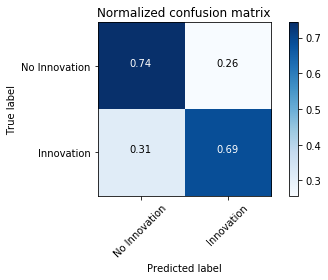

In [639]:
from helpers import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Innovation', 'Innovation'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Innovation', 'Innovation'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Output SVM

In [640]:
output_topics = list()
for topics in sentences_topics:
    if 'Outputs' in topics:
        output_topics.append(1)
    else:
        output_topics.append(0)

In [641]:
testDataLen = int(len(sentences) * 0.20)
X_train = sentences[:-testDataLen]
y_train = actor_topics[:-testDataLen]
X_test = sentences[-testDataLen:]
y_test = actor_topics[-testDataLen:]

In [642]:
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
from stemmed_vectorizer import StemmedCountVectorizer

pipe = Pipeline([
#                 ('vect', CountVectorizer()),
                 ('vect', StemmedCountVectorizer(stop_words='english')), 
                 ('tfidf', TfidfTransformer()),
                 ('sampling', NearMiss(version=1)),
#                 ('sampling', CondensedNearestNeighbour(random_state=0)),
#                 ('sampling', RandomUnderSampler()),
#                 ('svm', LinearSVC(C=1.0)),
                 ('clf-svm', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, max_iter=4, random_state=42)),
#                 ('mnb', MultinomialNB(fit_prior=False))
])
output_svm = pipe.fit(X_train, y_train)
y_pred = output_svm.predict(X_test)
print(np.mean(y_pred == y_test))

0.8058812917192856


Confusion matrix, without normalization
[[4345 1034]
 [  42  122]]
Normalized confusion matrix
[[0.81 0.19]
 [0.26 0.74]]


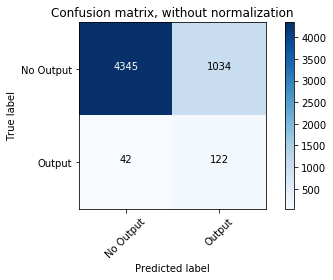

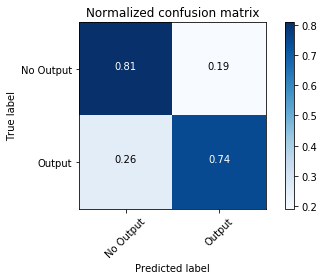

In [643]:
from helpers import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Output', 'Output'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Output', 'Output'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Test the Classifiers

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [645]:
df = pd.read_json('../svm_2g_test_data.json', lines=True)

In [646]:
def convert_to_labels(sent_probs):
    probs = sent_probs.copy()
    probs[::-1].sort()
    for index, prob in enumerate(sent_probs):
        if prob in probs[:2]:
            sent_probs[index] = 1
        else:
            sent_probs[index] = 0
    return sent_probs

In [647]:
def get_summary_by_prob(entry):
    sents = entry.doc.split('\n')
    objectives = convert_to_labels(objective_svm.predict_proba(sents)[:,1])
    actors = convert_to_labels(actor_svm.predict_proba(sents)[:,1])
    innovations = convert_to_labels(innovation_svm.predict_proba(sents)[:,1])
    outputs = convert_to_labels(output_svm.predict_proba(sents)[:,1])
    
    predicted = np.logical_or(objectives, actors)
    predicted = np.logical_or(predicted, innovations)
    predicted = np.logical_or(predicted, outputs)
    
    summary = list()
    for index, predict in enumerate(predicted):
        if int(predict) == 1:
            summary.append(sents[index])
    return ' '.join(summary)

df['topics_prob_summary'] = df.apply(lambda x: get_summary_by_prob(x), axis=1)

In [648]:
def get_summary(entry):
    sents = entry.doc.split('\n')
    
    objectives = objective_svm.predict(sents)
    actors = actor_svm.predict(sents)
    innovations = innovation_svm.predict(sents)
    outputs = output_svm.predict(sents)
    
    predicted = np.logical_or(objectives, actors)
    predicted = np.logical_or(predicted, innovations)
    predicted = np.logical_or(predicted, outputs)
    
    summary = list()
    for index, predict in enumerate(predicted):
        if int(predict) == 1:
            summary.append(sents[index])
    return ' '.join(summary)

df['topics_summary'] = df.apply(lambda x: get_summary(x), axis=1)

In [ ]:
df

In [308]:
with open('svm_2g_test_data.json', 'w') as f:
    f.write(df.to_json(orient='records', lines=True))

## Use OneVsRestClassifier to combine all SVMs in one Pipeline

In [527]:
all_topics = list()
for topics in sentences_topics:
    sent_topics = list()
    if 'Objective' in topics:
        sent_topics.append(0)    
    if 'Actors' in topics:
        sent_topics.append(1)    
    if 'Innovativeness' in topics:
        sent_topics.append(2)    
    if 'Outputs' in topics:
        sent_topics.append(3)    
    all_topics.append(sent_topics)

In [528]:
#np.column_stack((np.array(objective_topics),np.array(actor_topics),np.array(innovation_topics),np.array(output_topics)))

In [529]:
testDataLen = int(len(sentences) * 0.20)
X_train = sentences[:-testDataLen]
y_train = all_topics[:-testDataLen]
X_test = sentences[-testDataLen:]
y_test = all_topics[-testDataLen:]

In [530]:
from sklearn.preprocessing import MultiLabelBinarizer
y_train = MultiLabelBinarizer().fit_transform(y_train)
y_test = MultiLabelBinarizer().fit_transform(y_test)

In [531]:
len(y_train)

16836

In [532]:
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
from stemmed_vectorizer import StemmedCountVectorizer
from sklearn.multiclass import OneVsRestClassifier

pipe = Pipeline([
#                 ('vect', CountVectorizer()),
                 ('vect', StemmedCountVectorizer(stop_words='english')), 
                 ('tfidf', TfidfTransformer()),
                 ('sampling', NearMiss(version=1)),
#                 ('sampling', CondensedNearestNeighbour(random_state=0)),
#                 ('sampling', RandomUnderSampler()),
#                 ('svm', LinearSVC(C=1.0)),
                 ('clf-svm', OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))),
#                 ('mnb', MultinomialNB(fit_prior=False))
])
svm = pipe.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(np.mean(y_pred == y_test))

0.7754277566539924


In [ ]:
np.set_printoptions(threshold=np.nan)
y_pred

Confusion matrix, without normalization
[[12987  3541]
 [  239    65]]
Normalized confusion matrix
[[0.79 0.21]
 [0.79 0.21]]


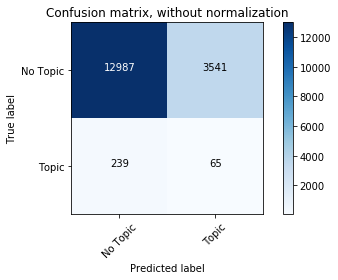

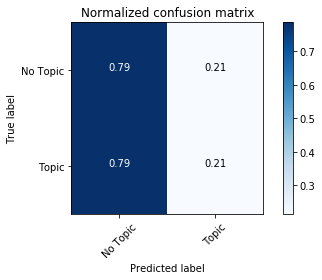

In [533]:
from helpers import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.flatten(), y_pred.flatten())
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Topic', 'Topic'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Topic', 'Topic'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [651]:
df1 = df[df['svm_summary'] != '']

# SVM Word level ROUGE score

In [654]:
from rouge import Rouge 

hypothesis = df1.svm_summary.values

reference = df1.summaries.values

rouge = Rouge()
rouge.get_scores(hypothesis, reference, avg=True)

{'rouge-1': {'f': 0.6035697477845939,
  'p': 0.6447180290103928,
  'r': 0.7173767526034857},
 'rouge-2': {'f': 0.5444049575957446,
  'p': 0.5987445821072509,
  'r': 0.6417451289241722},
 'rouge-l': {'f': 0.5483851150984909,
  'p': 0.6438007081179468,
  'r': 0.71416036827137}}

# SVM Topics ROUGE score

In [655]:
hypothesis = df1.topics_summary.values

reference = df1.summaries.values

rouge = Rouge()
rouge.get_scores(hypothesis, reference, avg=True)

{'rouge-1': {'f': 0.6092167449262029,
  'p': 0.5679798341961141,
  'r': 0.8587500793697362},
 'rouge-2': {'f': 0.5675285697745818,
  'p': 0.5386927894051703,
  'r': 0.8047446735740306},
 'rouge-l': {'f': 0.559975673283198,
  'p': 0.567547309206705,
  'r': 0.8564379687703758}}

# SVM 2 sents from topic ROUGE score

In [656]:
hypothesis = df1.topics_prob_summary.values

reference = df1.summaries.values

rouge = Rouge()
rouge.get_scores(hypothesis, reference, avg=True)

{'rouge-1': {'f': 0.4860095824896994,
  'p': 0.6719592507259069,
  'r': 0.42715565628972885},
 'rouge-2': {'f': 0.38718228510041536,
  'p': 0.5992265810425267,
  'r': 0.3266611961426206},
 'rouge-l': {'f': 0.42420815930459566,
  'p': 0.6657843142602144,
  'r': 0.4220431353928351}}

In [606]:
with open('rouge_scored_svms.json', 'w') as f:
    f.write(df1.to_json(orient='records', lines=True))

In [616]:
dfsumarunner = pd.read_json('rouge_scored_svms.json', lines=True)

In [657]:
hypothesis = dfsumarunner.sumarunner_summary.values

reference = dfsumarunner.summaries.values

rouge = Rouge()
rouge.get_scores(hypothesis, reference, avg=True)

{'rouge-1': {'f': 0.6388245331160347,
  'p': 0.8534453369152929,
  'r': 0.5545852260411361},
 'rouge-2': {'f': 0.5722528827519742,
  'p': 0.8175530810450781,
  'r': 0.49134989291655234},
 'rouge-l': {'f': 0.5737768689124221,
  'p': 0.8498476591537572,
  'r': 0.5519579276534691}}

In [670]:
df3 = pd.read_json('./rouge_scored_svms.json', lines=True)

In [672]:
def remove_newlines(entry):
    sents = entry.doc.split('\n')
    return ' '.join(sents)


df3['doc'] = df3.apply(lambda x: remove_newlines(x), axis=1)

In [674]:
counter = 0
def generate_id():
    global counter
    counter += 1
    return counter
df3['id'] = df3.apply(lambda x: generate_id(), axis=1)

In [676]:
with open('app_data.json', 'w') as f:
    f.write(df3[['id', 'doc', 'svm_summary', 'topics_prob_summary', 'sumarunner_summary']].to_json(orient='records'))

In [17]:
dftest = pd.read_json('sip_train.json', lines=True)

def get_cosine_summary(entry):
    sentences = entry.doc.split('\n')
    labels = entry.labels.split('\n')
    summary = []
    for index, sentence in enumerate(sentences):
        if labels[index] == '1':
            summary.append(sentence)
    return ' '.join(summary)
dftest['cosine_summary'] = dftest.apply(lambda x: get_cosine_summary(x),axis=1)

In [18]:
dftest[['summaries', 'cosine_summary']]

summaries  \
0   Pro Ratatouille is a community based organic agricultural program for disadvantaged Roma and non-Roma people, which also aims to spread sustainable developmental models among small village communities.\nIn practice, the village programs include complex adult education, employment, nutritional and community building activities.\nThe program was developed in the spirit of agro-based social business.\nThis approach emphasises the importance of agriculture, based rural development, fair distribution of the goods produced, community-based innovation and business development.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1   WeDoCare is a mobile app that aims to detect violent attacks against users through a scream detector, using machine learning and signal processing algorithms to infer emergency situations by processing data from the smartphoneâs microphone and accelerometer.It takes advantage of these mechanisms to help people by warning nearby citizens that someone is in danger.\nThe application can use the internet to transmit alarms but, if no network is available, an innovative beacon system with a range of up to 60 meters can also be used.\nWhen one user helps another, a connection is established and the app facilitates the trading of contact information, supporting integration and socialisation.\nHelpful locations, like hospitals or police stations, are shown on a map.\nThe map also shows zones where attacks occur more often so users can avoid these areas.\nThus, migrants are able to avoid these sites and, at the same time, discover essential locations, establishing and locating themselves in their new city.View all finalists/semi-finalists                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2   Seattle Community Network is a free public-access computer network.\nWe have been privileged to partner with the Seattle Public Library from our beginnings in 1994.\nSCN was originally a project of the Seattle Chapter of Computer Professionals for Social Responsibi

In [10]:
' '.join(dftest.iloc[17].summaries.split('\n'))

'SSMS is a communication mobile app that is based on sign language alphabets. Users can communicate using messages in both fingerspelling sign language alphabet and plain text spoken language alphabet. It is also an educational tool that can be used to improve both sign language and spoken language alphabet skills. SSMS aims to bridge the communication gap between the Deaf and Hearing cultures. Users who are deaf can sendreceive messages in their mother tongue sign language of their country. Users who are hearing can also sendreceive messages in their mother tongue spoken language of their country. Since each type of user can use their first language communication can be more effective and pleasant. The translation feature allows hearing users to convert sign language messages into plain text and vice versa.'